<a href="https://colab.research.google.com/github/amanjain487/learning_CV/blob/main/1%20Highlight%20Lanes%20in%20Road/2%20-%20Highlight%20Lane%20in%20Road%20by%20finding%20Thick%20Edges%20in%20Region%20of%20Interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Highlight Lane in Road

1. Select Region of Interest
2. Highlight/Mask the region of interest i.e., Lane

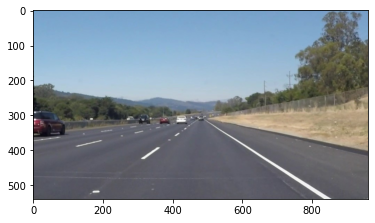

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# open image
image = cv2.imread('highlight Lane.png')

# opencv opens image in BGR format by default
# convert BGR to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot and display the image
plt.imshow(rgb)
plt.show()

(540, 960, 3)


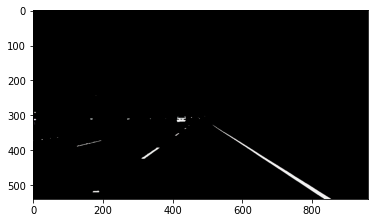

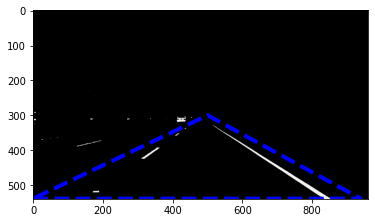

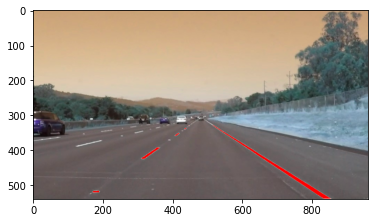

In [19]:
# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]

# to extract only selected pixels and store them
color_select= np.copy(image)

# final image with red coloured lanes
line_image = np.copy(image)

print(image.shape)

# Define our color criteria
red_threshold = 195
green_threshold = 195
blue_threshold = 195
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing)
left_bottom = [0, 539]
right_bottom = [939, 539]
apex = [500, 300]

# create a three sided polygon
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.show()



# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.show()
plt.imshow(line_image)
plt.show()